In [ ]:
# Comprobamos los paquetes instalados con el siguiente comando:
!pip freeze

In [ ]:
# Necesitaremos scikit-learn 0.18.2 y tensorflow 1.1.0
# Instalar estos dos paquetes y reiniciar el kernel (Reset Session)

In [1]:
%%bash
pip install tensorflow==1.1.0
pip install --upgrade sklearn

Requirement already up-to-date: sklearn in /usr/local/lib/python2.7/dist-packages
Requirement already up-to-date: scikit-learn in /usr/local/lib/python2.7/dist-packages (from sklearn)


In [1]:
# Ejemplo de como importar un archivo csv desde Cloud Storage y volcarlo en un dataframe de Pandas
# Fuente: https://stackoverflow.com/questions/37990467/how-can-i-load-my-csv-from-google-datalab-to-a-pandas-data-frame

# Dos análisis realmente buenos de este dataset se pueden encontrar en la plataforma Kaggle:
# https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now
# https://www.kaggle.com/currie32/predicting-fraud-with-tensorflow/notebook

import pandas as pd
import numpy as np
from StringIO import StringIO
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from __future__ import print_function, division

# Leemos el csv desde Cloud Storage
%storage read --object gs://analiticauniversal/DatasetsTF/creditcard.csv --variable creditcards
  
# Guardamos el csv en un dataframe de Pandas
df = pd.read_csv(StringIO(creditcards))

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# No existen NaN en los valores del dataset
df.isnull().values.any()

False

In [12]:
# Observando la media, vemos que el 0.17% de todas las transferencias realizadas son fraudulentas, por lo que el dataset está 
# realmente desbalanceado
df['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [13]:
# Vemos que las tres cuartas partes de las cantidades transferidas son menores a 77 euros
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
# Vemos como prácticamente tenemos el mismo número de transferencias cada uno de los dos días (la mediana está cercana a los 24 horas)
df['Time'].apply( lambda value: value / 3600).describe()

count    284807.000000
mean         26.337183
std          13.191152
min           0.000000
25%          15.055972
50%          23.525556
75%          38.700139
max          47.997778
Name: Time, dtype: float64

In [15]:
# Realizamos una 'deep copy' y separamos en dos datasets representando a los dos tipos de transacciones
df_fraud = df.loc[df['Class'] == 1].copy() 
df_fraud['Time'] = df_fraud['Time'].apply( lambda value: value / 3600)
df_no_fraud = df.loc[df['Class'] == 0].copy() 
df_no_fraud['Time']= df_no_fraud['Time'].apply( lambda value: value / 3600)

In [16]:
# Podemos llamar a la Google Charting API para crear gráficos interactivos
# En este caso vemos las cantidades de transferencias fraudulentas que se han realizado a lo largo de las horas 
# Nota: no se ha realizado el gráfico para las no fraudulentas dado que son muchos puntos en el plano y esto vuelve a Datalab inestable

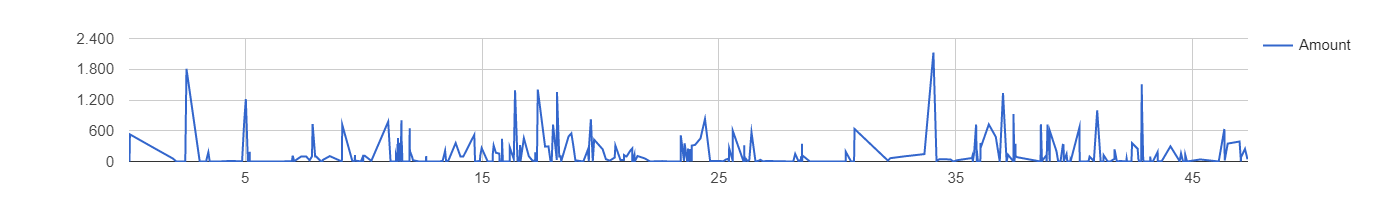

In [17]:
%%chart line --fields Time,Amount --data df_fraud

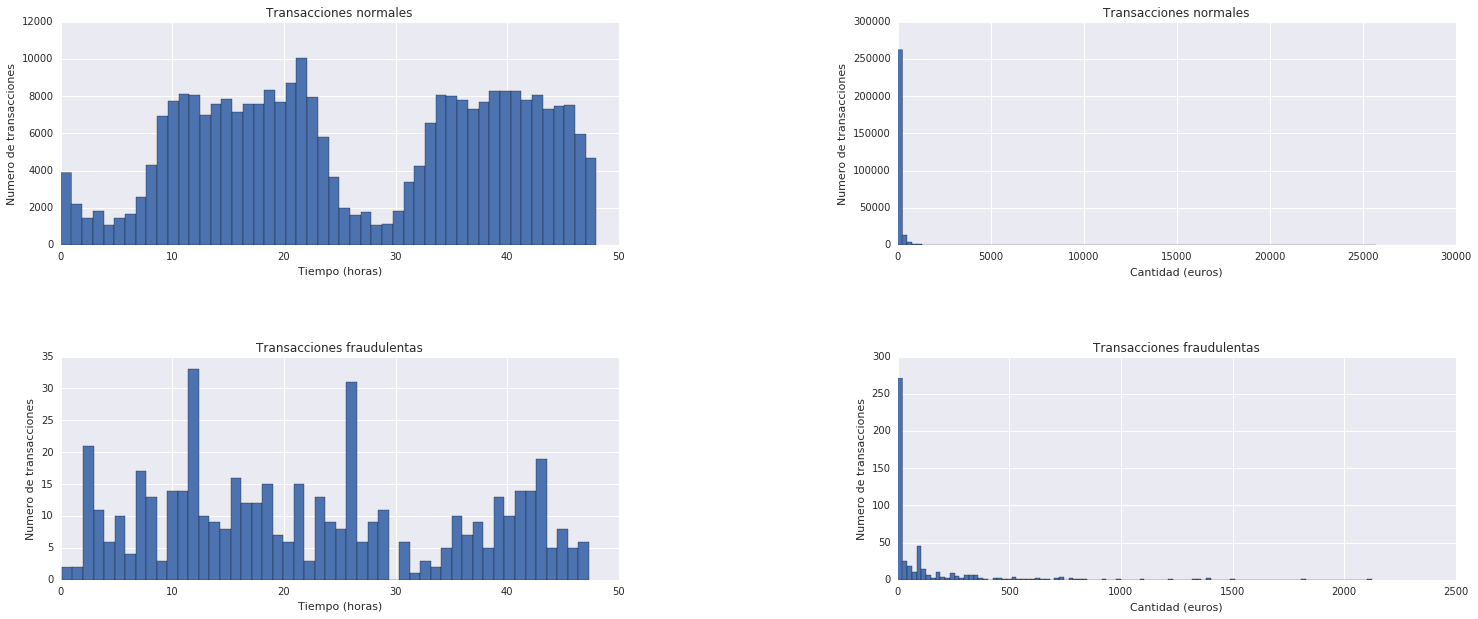

In [18]:
# Código obtenido (y modificado) a partir de: https://www.kaggle.com/currie32/predicting-fraud-with-tensorflow/notebook
# Ejemplo para entender plt.subplots : https://matplotlib.org/examples/pylab_examples/subplots_demo.html
f, axes = plt.subplots(2, 2, figsize=(25,10))


# Ajuste entre subplots 
# Fuente: https://stackoverflow.com/questions/5159065/need-to-add-space-between-subplots-for-x-axis-label-maybe-remove-labelling-of-a
f.subplots_adjust(hspace=.50, wspace=.50)

bins_time = 50

axes[1,0].hist(df_fraud['Time'], bins = bins_time)
axes[1,0].set_title('Transacciones fraudulentas')
axes[1,0].set_xlabel('Tiempo (horas)')
axes[1,0].set_ylabel('Numero de transacciones')

axes[0,0].hist(df_no_fraud['Time'], bins = bins_time)
axes[0,0].set_title('Transacciones normales')
axes[0,0].set_xlabel('Tiempo (horas)')
axes[0,0].set_ylabel('Numero de transacciones')

bins_amount = 100
axes[1,1].hist(df_fraud['Amount'], bins = bins_amount)
axes[1,1].set_title('Transacciones fraudulentas')
axes[1,1].set_xlabel('Cantidad (euros)')
axes[1,1].set_ylabel('Numero de transacciones')

axes[0,1].hist(df_no_fraud['Amount'], bins = bins_amount)
axes[0,1].set_title('Transacciones normales')
axes[0,1].set_xlabel('Cantidad (euros)')
axes[0,1].set_ylabel('Numero de transacciones')


In [19]:
# Dado que los histogramas para las cantidades de dinero están muy descompensados, vamos a ver los percentiles de los dos datasets
# Vemos como las tres cuartas partes de las transferencias fraudulentas están por debajo de los 105€
df_fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
# Para el caso de las transferencias normales vemos como las transferencias se distribuyen de manera similar a las transferencias fraudulentas
df_no_fraud['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

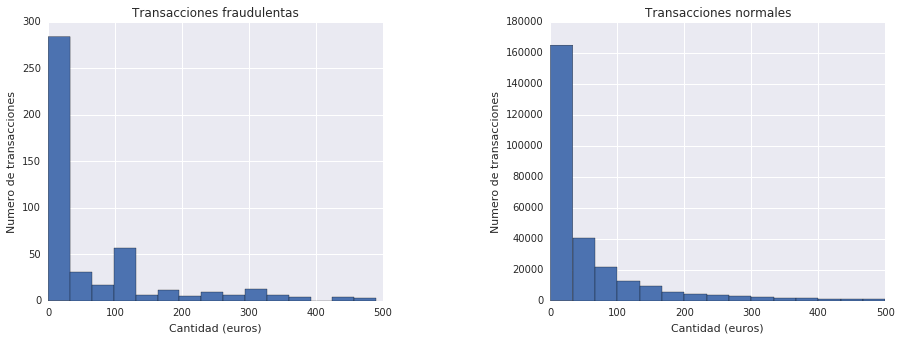

In [21]:
'''
 Tras ver que aproximadamente el 75% de transacciones normales y fraudulentas están por debajo de 100€, filtramos en cada dataset y obtenemos que 
 mientras que para las transferencias normales las cantidades decrecen de forma asintótica,
 en el gráfico de transferencias fraudulentas existe un gran número de ellas menores a 30€
 y a partir de ahí ese número disminuye de forma realmente brusca. Interesante notar como este descenso brusco vuelve a repuntar algo para las 
 transferencias entre (aproximadamente) 100 y 130€
'''

def plot_histograms(lim, bins):
  
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

  f.subplots_adjust(hspace=.50, wspace=.50)


  df_am1 = df_fraud[ df_fraud['Amount'] < lim] 
  df_am2 = df_no_fraud[ df_no_fraud['Amount'] < lim] 

  ax1.hist(df_am1['Amount'], bins = bins)
  ax1.set_title('Transacciones fraudulentas')
  ax1.set_xlabel('Cantidad (euros)')
  ax1.set_ylabel('Numero de transacciones')

  ax2.hist(df_am2['Amount'], bins = bins)
  ax2.set_title('Transacciones normales')
  ax2.set_xlabel('Cantidad (euros)')
  ax2.set_ylabel('Numero de transacciones')


# Tomamos transferencias de menos de 500€ y elegimos 15 bins
plot_histograms(lim = 500, bins = 15)

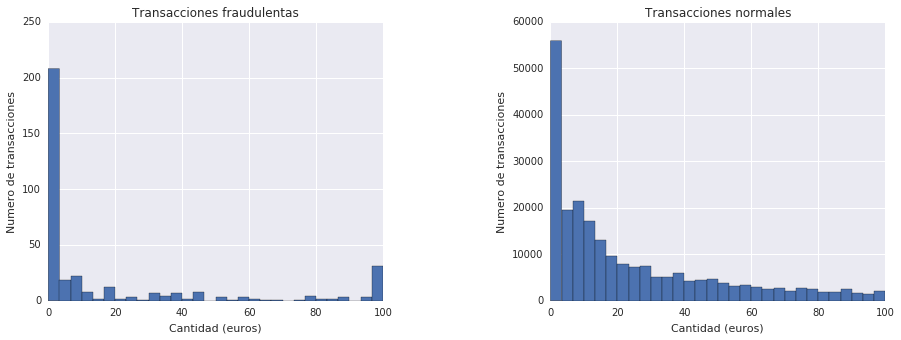

In [22]:
# Hacemos 'zoom' y nos quedamos con transferencias de menos de 100€ (sabemos que en cada tabla son aproximadamente el 75% de las transferencias totales)
# Vemos como el 'repunte' en transferencias fraudulentas está en aquellas cercanas a los 100€.
# Además vemos como podemos precisar y decir que cerca de 200 transferencias fraudulentas son menores a 3.3€
plot_histograms(lim = 100, bins = 30)

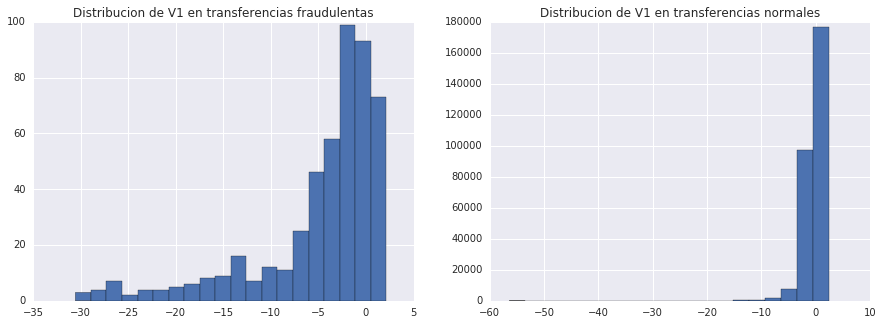

In [23]:
'''
 Para las variables númerica V1-V28 que han sido anonimizadas, podríamos hacer 'feature engineering'
 analizando como se distribuyen los valores de estas variables e ir eliminando aquellas con una distribución similar
 para los dos tipos de transferencias
 Para evitar alargar el notebook, aquí solo lo haremos para V1. Esta variable no sería de gran ayuda para clasificar
 las transferencias, pues para los dos tipos los valores se concentran entre -10 y 0.
 Mostraremos que gracias a las redes neuronales podemos evitar este proceso de descartar 'manualmente' variables del modelo
'''

f, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

bins = 20

ax1.hist(df_fraud['V1'], bins = bins)
ax1.set_title('Distribucion de V1 en transferencias fraudulentas')

ax2.hist(df_no_fraud['V1'], bins = bins)

ax2.set_title('Distribucion de V1 en transferencias normales')



In [24]:
#Función para plotear tras aplicar el PCA
def plot_data_2d(X, y, x_lims = None, y_lims = None):
    color_map = {0:'red', 1:'blue'}
    plt.figure()
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl,0], 
                    y = X[y==cl,1], 
                    c = color_map[idx], 
                    label = cl)
    plt.xlabel('dimension 1 tras aplicar PCA')
    plt.ylabel('dimension 2 tras aplicar PCA')
    plt.legend(loc='upper left')
    plt.title('Algoritmo PCA ejecutado sobre el dataset de tarjetas de credito')
    if x_lims is not None and y_lims is not None:
        plt.xlim(x_lims)
        plt.ylim(y_lims)
    plt.show()

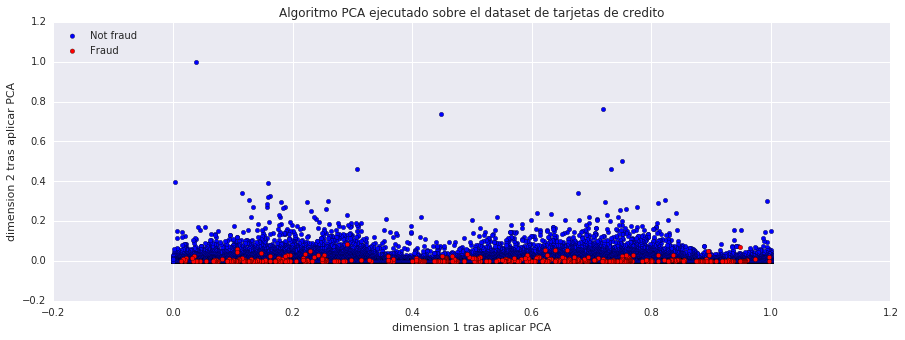

In [43]:
# Aplicamos Principal Component Analysis gracias al paquete Scikit-learn
from sklearn import decomposition

df_aux = df.copy()
t = df_aux['Class']
df_aux.drop('Class', axis=1, inplace=True)

pca = decomposition.PCA(n_components=2)
X = pca.fit(df_aux).transform(df_aux)

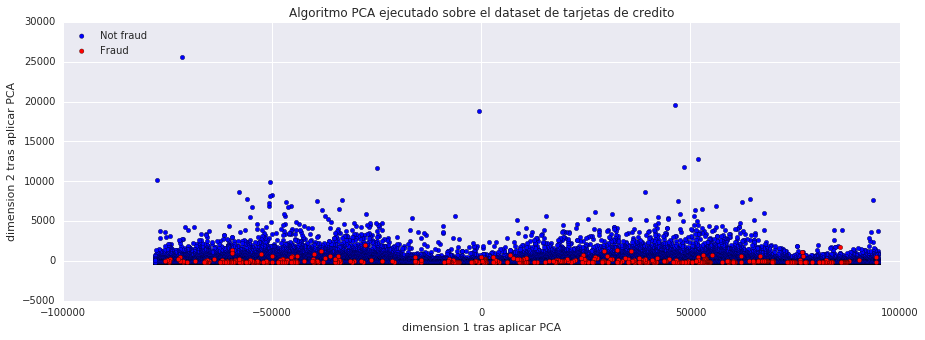

In [45]:
# Mostramos en el gráfico los dos tipos de transferencias tras obtener los resultados del PCA
fraud = np.array(t == 1)
not_fraud = np.array(t == 0)

f, ax = plt.subplots(figsize=(15,5))

ax.scatter(x = X[ not_fraud, 0], y = X[ not_fraud, 1], c = 'blue', label = 'Not fraud' )
ax.scatter(x = X[ fraud, 0], y = X[ fraud, 1], c = 'red', label = 'Fraud')

ax.set_xlim(-100000, 100000)
ax.set_xlabel('dimension 1 tras aplicar PCA')
ax.set_ylabel('dimension 2 tras aplicar PCA')
ax.legend(loc='upper left')
ax.set_title('Algoritmo PCA ejecutado sobre el dataset de tarjetas de credito')

In [3]:
# Pasamos el dataframe a un array de Numpy y realizamos el particionado en conjunto de entrenamiento, validación y test
dataset = df.as_matrix().astype(float)

TRAIN_SIZE = 0.8
VAL_SIZE = 0.1
TEST_SIZE = 0.1

X_train, X_test, y_train, y_test = train_test_split(dataset[:,:-1], dataset[:,-1], test_size=TEST_SIZE)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=VAL_SIZE/TRAIN_SIZE)

In [4]:
X_train.shape

(224285, 30)

In [5]:
X_val.shape

(32041, 30)

In [6]:
X_test.shape

(28481, 30)

In [ ]:
# Fuentes: https://www.datacamp.com/community/tutorials/machine-learning-python#gs.ZBuUsUY
# http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#support-vector-machines-svms

# Import the svm model
# Mas sobre SVMs: http://scikit-learn.org/stable/modules/svm.html
from sklearn import svm

# Create the SVC model 
#svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model = svm.SVC(kernel='poly', degree=3)
#svc_model = svm.SVC(kernel='rbf')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train)


In [5]:
from sklearn.linear_model import LogisticRegression
# Source: http://nbviewer.jupyter.org/gist/justmarkham/6d5c061ca5aee67c4316471f8c2ae976
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X_train, y_train)

# check the accuracy on the training set
model.score(X_test, y_test)*100

99.905199957866657

In [ ]:
# Apply the classifier to the test data, and view the accuracy score
clf.score(X_test, y_test) 

In [7]:
import numpy as np
#import tensorflow
# Importamos tensorflow, aunque solo para utilizar un módulo que permite gestionar muchas 
import tensorflow as tf
import sys


from tensorflow.contrib.keras.python.keras.regularizers import l1,l2
from tensorflow.contrib.keras.python.keras.models import Sequential, load_model
from tensorflow.contrib.keras.python.keras.layers import Dense, Dropout, Activation
from tensorflow.contrib.keras.python.keras.constraints import max_norm
from tensorflow.contrib.keras.python.keras.optimizers import RMSprop, Adam
from tensorflow.contrib.keras.python.keras.layers.normalization import BatchNormalization
from tensorflow.contrib.keras.python.keras.callbacks import CSVLogger, TensorBoard, EarlyStopping
from sklearn.metrics import roc_auc_score
from datetime import datetime
from os.path import abspath
import os


# Disable info warnings from TF
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'


In [8]:
# Creamos jerarquía en Storage y en Local (Compute Engine sobre el que se monta Datalab)
# Una posible mejora sería usar os.path.join en vez de unir rutas a mano con '/'


# Los carpetas de los logs se nombran siguiendo una jerarquía 
NOW = datetime.now().strftime("%Y-%m-%d--%Hh%Mm%Ss")

# Jerarquía de directorios que se creará Google Cloud Storage
bucket_name = 'analiticauniversal'
logs_folder = 'LogsTF'
ROOT_LOGDIR = 'gs://' + bucket_name + '/' + logs_folder
LOG_DIR = '{}/run-{}'.format(ROOT_LOGDIR, NOW)
OUTPUT_FILE = LOG_DIR + '/results.txt'

# Jerarquía de directorios a crear en la instancia Datalab
ROOT_DATALAB = '/tmp_logs'
LOCAL_DIR = '{}/run-{}'.format(ROOT_DATALAB,NOW)
CSV_LOG = LOCAL_DIR + '/training.log'

# Utilizamos un módulo de Tensorflow para crear los directorios en local y en Storage
if tf.gfile.Exists(LOG_DIR):
    tf.gfile.DeleteRecursively(LOG_DIR)
tf.gfile.MakeDirs(LOG_DIR)

if tf.gfile.Exists(LOCAL_DIR):
    tf.gfile.DeleteRecursively(LOCAL_DIR)
tf.gfile.MakeDirs(LOCAL_DIR)

In [9]:
##################################################
# Hiperparámetros de la red neuronal
batch_size = 500
epochs = 300
dropout_rate = 0.5
##################################################


# Parámetros para el mecanismo de parada
# Parameters for early stopping (increase them when using auc scores)
DELTA = 1e-6
PATIENCE = 20

In [10]:
csv_logger = CSVLogger(CSV_LOG)
early_stopping = EarlyStopping(min_delta = DELTA, patience = PATIENCE )
tb = TensorBoard(log_dir = LOCAL_DIR,histogram_freq = 1, 
                 write_graph = True, write_images = False)


# 30 variables entrada
input_dim = dataset.shape[1] - 1
num_classes = 2

model = Sequential()

model.add(Dense(10,input_shape=(input_dim,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


# Entrenamos el modelo usando una función de coste y un optimizador para el algoritmo de descenso de gradiente
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Problema con el tb
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    callbacks=[csv_logger, early_stopping,tb])


score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1], "\n")

y_pred = model.predict_proba(X_test, verbose = 0)
y_score = y_pred[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_score)
auc *=100
print("Test AUC:", auc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 372.0
Trainable params: 352.0
Non-trainable params: 20.0
_________________________________________________________________
Train on 224285 samples, validate on 32041 samples
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 inste

In [58]:
x_copy = X_test
y_pred = model.predict_proba(x_copy, verbose = 0)
y_score = y_pred[:,1]

y_score[ y_score < 0.5] = 0
y_score[ y_score >= 0.5] = 1

errors = abs(y_score-y_test).sum()
#total = df['Class'].sum()
total = y_train.sum()

per_mispredict = (errors / total)* 100
per_mispredict

8.695652173913043

In [11]:
sys.stdout = tf.gfile.Open(name=OUTPUT_FILE, mode='w')  
json_string = model.to_json() 
print("Network structure (json format)", "\n")
print(json_string, "\n")
print("Hyperparameters", "\n")
print("Batch size:", batch_size)
print("Epochs:", epochs)
print("Dropout rate:", dropout_rate, "\n")
model.summary()
print('\n','Test loss:', score[0])
print('Test accuracy:', score[1]*100, '\n')
print('Test AUC:', auc)
sys.stdout = sys.__stdout__

Test AUC: 85.9443929882


In [12]:
# Copia los outputs de Keras a GCS
# Usar os.path.join mejor que '/'
for filename in tf.gfile.ListDirectory(LOCAL_DIR):
    tf.gfile.Copy(oldpath=LOCAL_DIR + '/' + filename , newpath=LOG_DIR + '/' +  filename )
    
for filename in tf.gfile.ListDirectory(ROOT_DATALAB):
    tf.gfile.DeleteRecursively(ROOT_DATALAB + '/' + filename)

In [13]:
tf.gfile.ListDirectory(ROOT_DATALAB)

[]